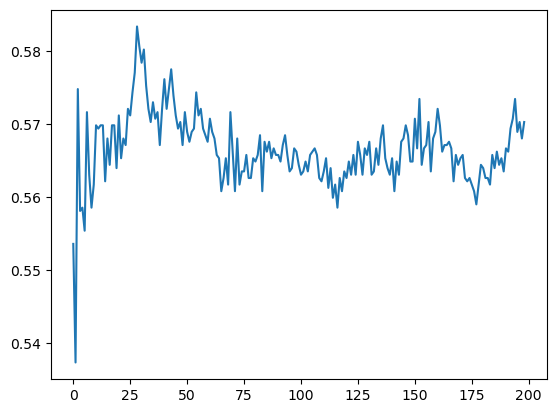

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

all_tweets = pd.read_json("random_tweets.json", lines=True)

median_retweets = all_tweets['retweet_count'].median()

all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweets, 1, 0)

all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis = 1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user'] ['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user'] ['friends_count'], axis=1)
all_tweets['hashtag_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis = 1)

labels = all_tweets['is_viral']
data = all_tweets [['tweet_length', 'followers_count', 'friends_count', 'hashtag_count']]

scaled_data = scale(data, axis=0)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=1)

scores = []
for k in range (1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

plt.plot(scores)
plt.show()


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

new_york_tweets = pd.read_json("new_york.json", lines=True)
london_tweets = pd.read_json("london.json", lines=True)
paris_tweets = pd.read_json("paris.json", lines=True)

new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()
paris_text = paris_tweets["text"].tolist()


all_tweets = new_york_text + london_text + paris_text
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels, test_size = 0.2, random_state = 1)

print (len(train_data))
print (len(test_data))

10059
2515


In [61]:
# Making the count vectors to use Naive Bayes Classifier
# Train and test the Naive Bayes Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

new_york_tweets = pd.read_json("new_york.json", lines=True)
london_tweets = pd.read_json("london.json", lines=True)
paris_tweets = pd.read_json("paris.json", lines=True)

new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()
paris_text = paris_tweets["text"].tolist()


all_tweets = new_york_text + london_text + paris_text
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels, test_size = 0.2, random_state = 1)

counter = CountVectorizer ()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)

print (predictions)


[0 2 1 ... 1 0 1]


In [69]:
# Evaluating the model using accuracy score and the confusion matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

new_york_tweets = pd.read_json("new_york.json", lines=True)
london_tweets = pd.read_json("london.json", lines=True)
paris_tweets = pd.read_json("paris.json", lines=True)

new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()
paris_text = paris_tweets["text"].tolist()


all_tweets = new_york_text + london_text + paris_text
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels, test_size = 0.2, random_state = 1)

counter = CountVectorizer ()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)

tweet = "Je suis Vietnamien"

tweet_counts = counter.transform ([tweet])
classifier.predict(tweet_counts)

print (accuracy_score(test_labels, predictions))
print (confusion_matrix(test_labels, predictions))
print (classifier.predict(tweet_counts))



0.6779324055666004
[[541 404  28]
 [203 824  34]
 [ 38 103 340]]
[2]
